In [1]:
import numpy as np
from matplotlib.pyplot import *

Text(0.5, 1.0, 'sigmoid')

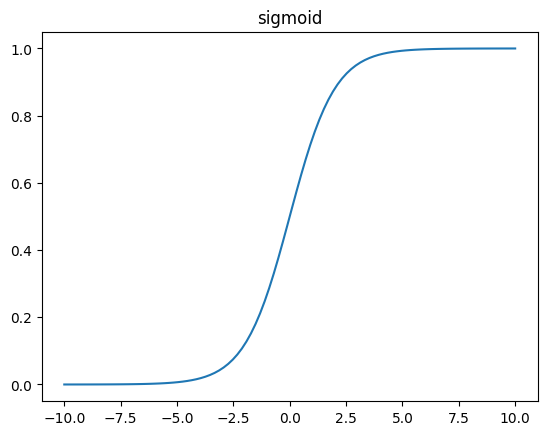

In [2]:
x = np.linspace(-10,10,100)
y = 1/(1+np.exp(-x))
plot(x,y); title('sigmoid')

Text(0.5, 1.0, 'Hyperbolic tangent')

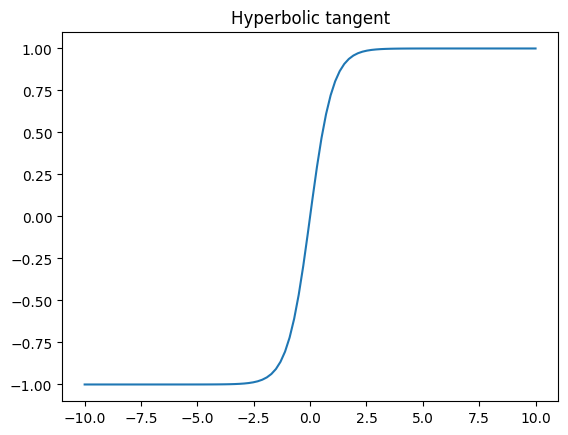

In [3]:
y = np.tanh(x)
plot(x,y); title('Hyperbolic tangent')

Text(0.5, 1.0, 'Rectified linear unit')

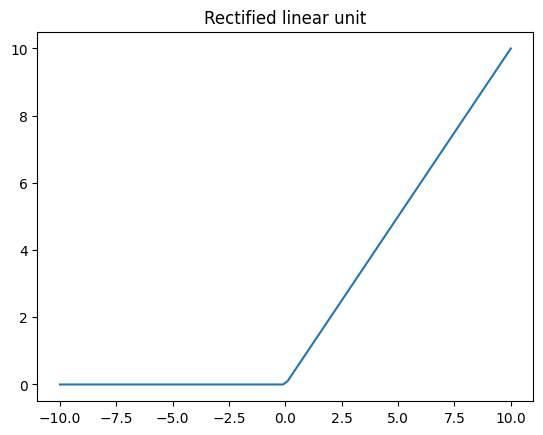

In [4]:
y = np.maximum(0,x)
plot(x,y); title('Rectified linear unit')

Text(0.5, 1.0, 'Softplus')

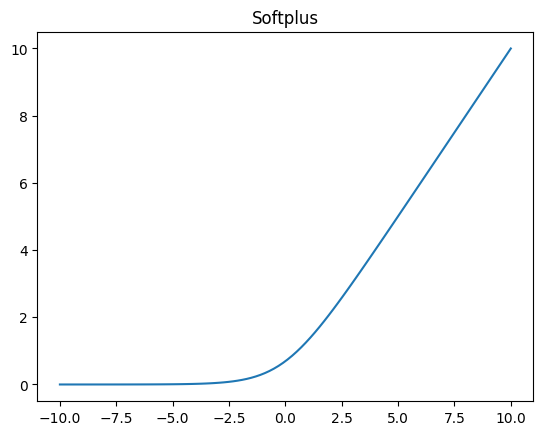

In [5]:
y = np.log(1+np.exp(x))
plot(x,y); title('Softplus')

Text(0.5, 1.0, 'Parameterized ReLU')

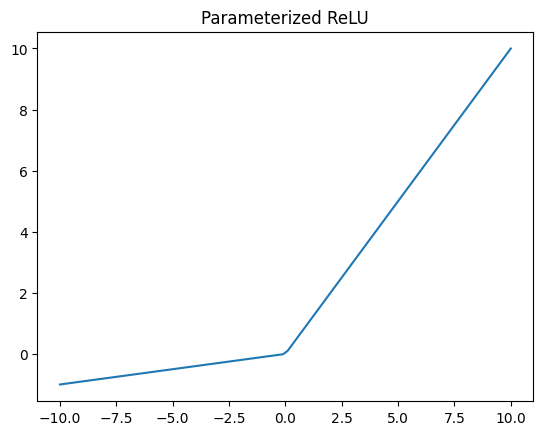

In [6]:
y = np.zeros(len(x))
for i in range(len(x)):
    if x[i] < 0:
        y[i] = 0.1*x[i]
    else:
        y[i] = x[i]
plot(x,y); title('Parameterized ReLU')

In [7]:
np.zeros((5,2)).shape

(5, 2)

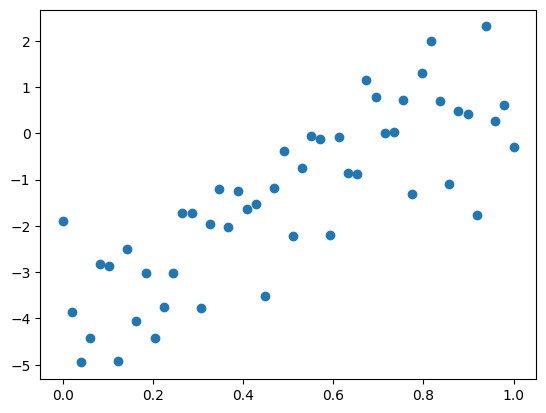

In [8]:
import numpy as np
from matplotlib import pyplot as plt
n = 50
x = np.linspace(0, 1, n)
w = 5; b = -4 # true parameters
y = w*x + b + np.random.randn(n)
plt.plot(x,y,'o')
plt.show()

[[16.83673469 25.        ]
 [25.         50.        ]] [-12.76255756 -69.17765043] [ 5.03288054 -3.89999328]


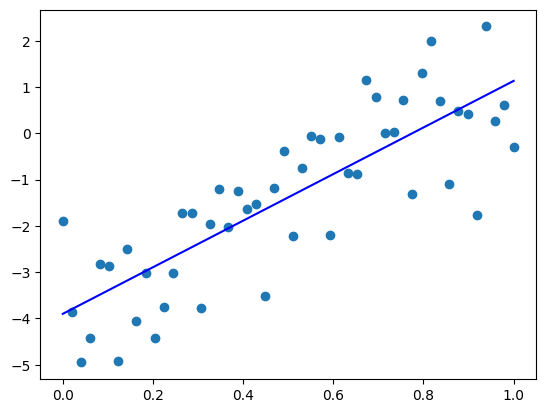

In [9]:
A11 = np.sum(x*x)
A12 = np.sum(x)
A = np.array([[A11,A12],[A12,n]])
b = np.array([np.sum(x*y), np.sum(y)])
m = np.linalg.inv(A).dot(b)
print(A,b,m)
y1 = m[0]*x+m[1]
plt.plot(x,y,'o',x,y1,'b-')
plt.show()

In [10]:
# m = [w,b]
def grad(m,x,y):
    e = m[0]*x+m[1]-y
    return np.array([np.sum(e*x), np.sum(e)])

In [11]:
# g = [gw,gb]
def step(m,x,y,g):
    e = m[0]*x+m[1]-y
    gg = g[0]*x+g[1]
    return np.sum(e*gg)/np.sum(gg*gg)

In [12]:
# loss function
def loss(m,x,y):
    e = m[0]*x+m[1]-y
    return 0.5*np.sum(e*e)

In [13]:
# implementation of BGD
m0 = np.random.randn(2)
print(loss(m0,x,y))
for i in range(10):
    g = grad(m0,x,y)
    s = step(m0,x,y,g)
    #s = 0.001
    m = m0 - s*g
    print(loss(m,x,y))
    m0 = m

136.00056912191846
81.7960009102228
54.570401567641376
40.895663736175
34.027184831217745
30.57731960899114
28.844538564422603
27.97420597024721
27.537059669011732
27.317492011816373
27.207208667430262


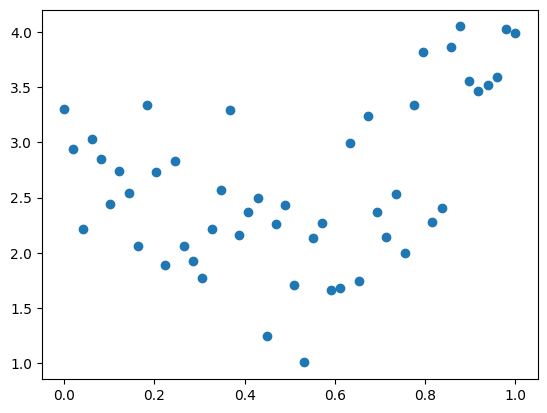

In [14]:
# Polynomial regression
import numpy as np
from matplotlib import pyplot as plt
n = 50
x = np.linspace(0, 1, n)
a = 5; b = -4; c = 3
y = a*x*x + b*x + c + 0.5*np.random.randn(n)
plt.plot(x,y,'o')
plt.show()

In [15]:
# m = [w,b]
def grad_sgd(m,x,y,i):
    e = m[0]*x[i]+m[1]-y[i]
    return np.array([e*x[i], e])

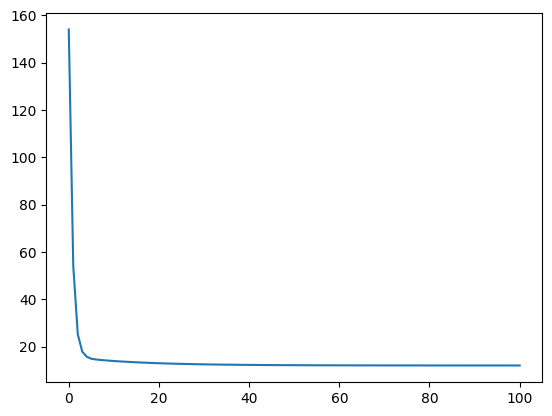

In [21]:
# implementation of SGD
lr = 0.01
nepochs = 100
m = np.random.randn(2)
l = np.zeros(nepochs+1)
l[0] = loss(m,x,y)
#print(0,l[0])
for e in range(nepochs):
    for i in np.random.permutation(n):
        g = grad_sgd(m,x,y,i)
        m = m - lr*g
    l[e+1] = loss(m,x,y)
    #print(e+1, l[e+1])
plt.plot(np.arange(nepochs+1),l)

In [17]:
# minibatch
n = 50
b = 10
nb = int(n/b)
i = np.random.permutation(n).reshape(nb,b)
for j in range(nb):
    xb, yb = x[i[j]], y[i[j]]   # minibatch data

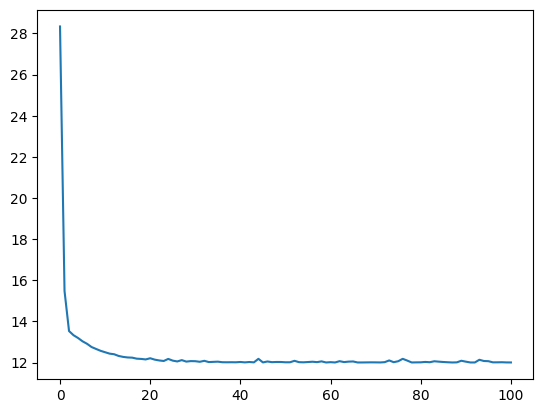

In [18]:
# implementation of MGD
lr = 0.02
nepochs = 100
m = np.random.randn(2)
l = np.zeros(nepochs+1)
l[0] = loss(m,x,y)
n = 50
b = 10
nb = int(n/b)
for e in range(nepochs):
    i = np.random.permutation(n).reshape(nb,b)
    for j in range(nb):
        xb, yb = x[i[j]], y[i[j]]   # minibatch data
        g = grad(m,xb,yb)
        m = m - lr*g
    l[e+1] = loss(m,x,y)
plt.plot(np.arange(nepochs+1),l)